In [2]:
df = pd.read_csv("Telco_Cusomer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

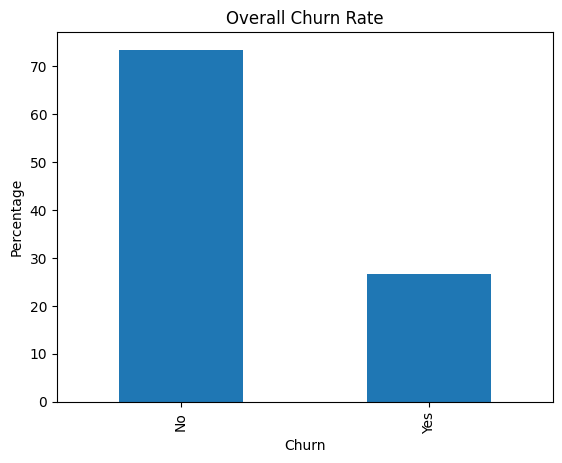

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [5]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100

churn_rate.plot(kind='bar')
plt.title("Overall Churn Rate")
plt.ylabel("Percentage")
plt.show()

print(churn_rate)

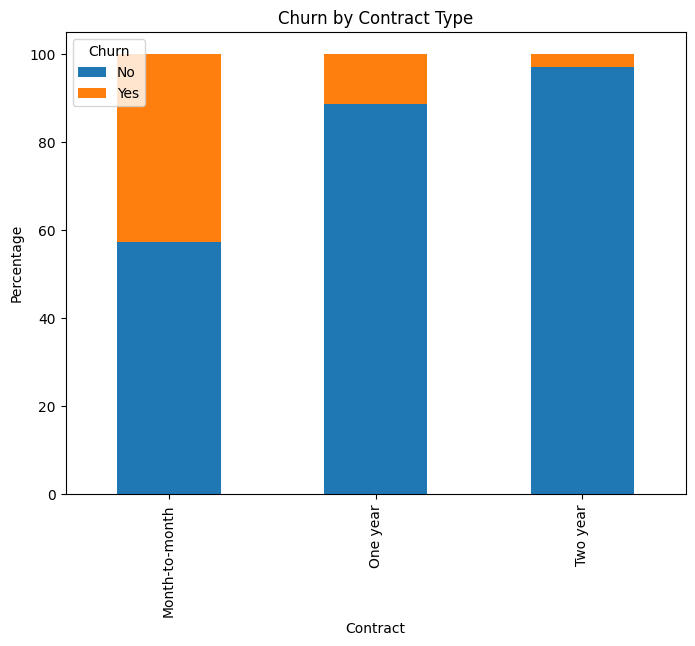

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


In [6]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

contract_churn.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Churn by Contract Type")
plt.ylabel("Percentage")
plt.show()

contract_churn

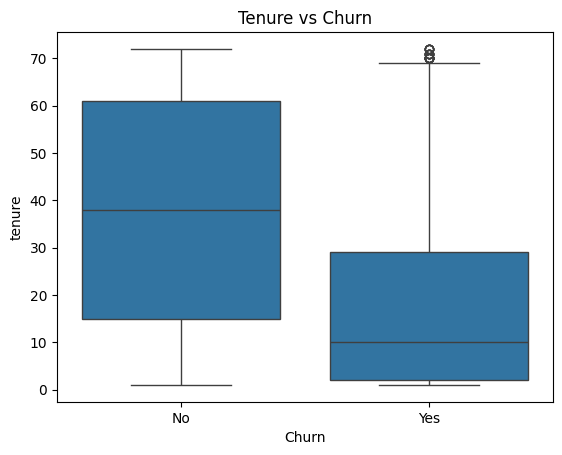

In [7]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

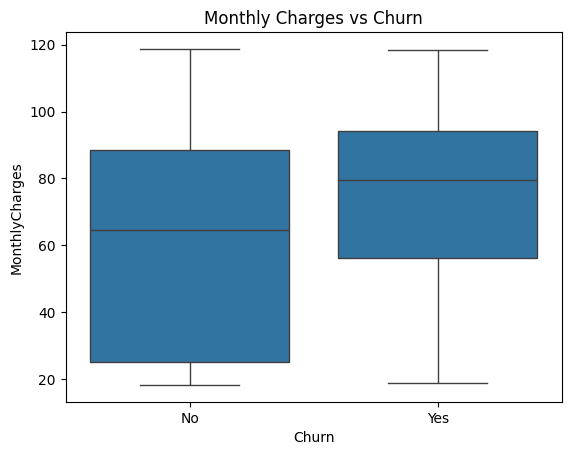

In [8]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

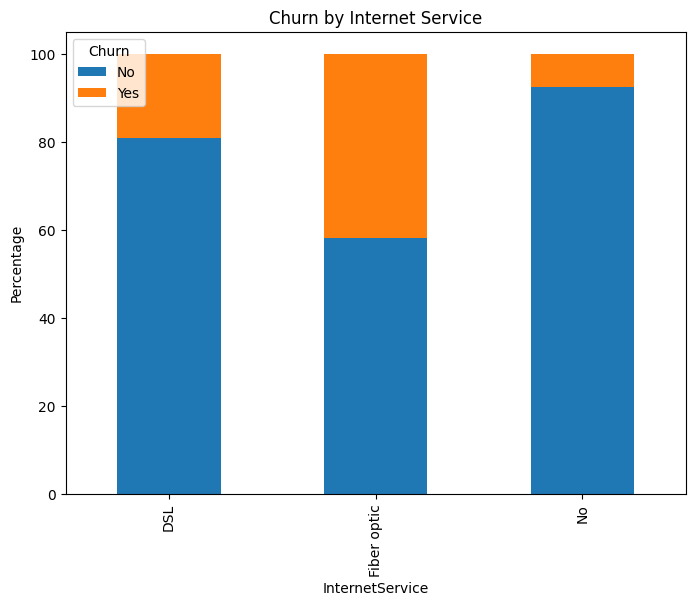

In [9]:
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100

internet_churn.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Churn by Internet Service")
plt.ylabel("Percentage")
plt.show()

## Internet Service Insight

- Customers using Fiber optic service show the highest churn rate.
- DSL customers have lower churn comparatively.
- The company should investigate pricing or service quality issues related to fiber optic plans.

---

# Final Business Recommendations

- Encourage customers to shift from month-to-month to long-term contracts.
- Focus retention efforts on new customers with low tenure.
- Review pricing for high monthly charge customers.
- Improve fiber optic service experience.
- Implement loyalty rewards and personalized retention strategies.